In [1]:
import numpy as np

## 실습 1. Confusion Matrix (Accuracy, Precision, Recall and F1-score)

##### Confusion Matirx : 예측값과 실제값을 각각 긍정/부정으로 나누어 4가지 방식으로 표현하는 것

In [2]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

In [3]:
def confusion_mat(pred, label) :
    tp = np.sum(np.logical_and(pred == 1, label == 1))
    fp = np.sum(np.logical_and(pred == 1, label == 2))
    fn = np.sum(np.logical_and(pred == 2, label == 1))
    tn = np.sum(np.logical_and(pred == 2, label == 2))
    return np.array([[tp, fp], [fn, tn]])

confusion_mat(pred1, label1)

array([[6, 7],
       [4, 3]])

##### Accuracy (정확도)

In [4]:
def accuarcy(pred, label) :
    tp = confusion_mat(pred, label)[0][0]
    tn = confusion_mat(pred, label)[1][1]
    return (tp + tn) / len(pred)

accuarcy(pred1, label1)

0.45

##### Precision (Positive 예측값 (PPV))

In [5]:
def precision(pred, label) :
    tp = confusion_mat(pred, label)[0][0]
    fp = confusion_mat(pred, label)[0][1]
    print(tp)
    print(fp)
    return tp / (tp + fp)

precision(pred1, label1)

6
7


0.46153846153846156

##### Recall (True Positive 민감도 (TPR))

In [6]:
def recall(pred, label) :
    tp = confusion_mat(pred, label)[0][0]
    fn = confusion_mat(pred, label)[1][0]
    return tp / (tp + fn)

recall(pred1, label1)

0.6

##### F1 Score (Precision과 Recall의 조화 평균)

In [7]:
def f1_score(pred, label) :
    p = precision(pred, label)
    r = recall(pred, label)
    return 2 * p * r / (p + r)

f1_score(pred1, label1)

6
7


0.5217391304347826

## 실습 2. Micro & Macro averaged precision

In [8]:
# data (1 : positive, 2 : negative)

# class 1
pred1 = np.array([1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 1, 2, 1])
label1 = np.array([1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2])

# class 2
pred2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1])
label2 = np.array([2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 1])

##### Micro Averaging : 각 클래스에 대한 결과를 모은 후, Confusion Matrix 계산

In [9]:
def micro_avg() :
  cm1 = confusion_mat(pred1, label1)
  cm2 = confusion_mat(pred2, label2)
  tp = np.sum([cm1[0][0], cm2[0][0]])
  fp = np.sum([cm1[0][1], cm2[0][1]])
  micro_precision = tp / (tp + fp)
  return micro_precision

##### Macro Averaging : 각 클래스 마다 따로 계산을 한 다음 평균 계산

In [10]:
def macro_avg() :
  cm1 = confusion_mat(pred1, label1)
  cm2 = confusion_mat(pred2, label2)
  precision1 = cm1[0][0] / (cm1[0][0] + cm1[0][1])
  precision2 = cm2[0][0] / (cm2[0][0] + cm2[0][1])
  macro_precision = (precision1 + precision2) / 2
  return macro_precision

In [11]:
micro = micro_avg()
print("Micro average : ",micro)

macro = macro_avg()
print("Macro average : ",macro)

Micro average :  0.5294117647058824
Macro average :  0.6057692307692308


Micro Average Precision는 대규모 예측문제로 취급하는 반면, Macro Average Precision은 각 클래스 마다 예측하고 평균을 구한다

Micro AP는 공통의 클래스에 집중하여, 모든 클래스를 동등하게 중요하게 생각하는 경우 유용하다

Macro AP는 Rare한 클래스에 집중하여 클래스 불균형이 심하다

Micro AP는 클래스 크게에 따라 가중치가 부여되지만, Macro AP는 동일하다

## 실습 3. mean Average Precision

##### mAP를 통해 Precision-Recall Curve에 대한 그래프를 출력하라

In [12]:
conf = np.array([0.85, 0.87, 0.82, 0.71, 0.45, 0.75, 0.73, 0.9, 0.93, 0.95, 0.94, 0.92, 0.91, 0.74, 0.76, 0.45, 0.72, 0.87, 0.84, 0.84])
label = np.array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1])
threshold_list = np.array([0.95, 0.94, 0.93, 0.92, 0.91, 0.90, 0.87, 0.87, 0.85, 0.84, 0.84, 0.82, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.45, 0.45])

0.4800269905533064


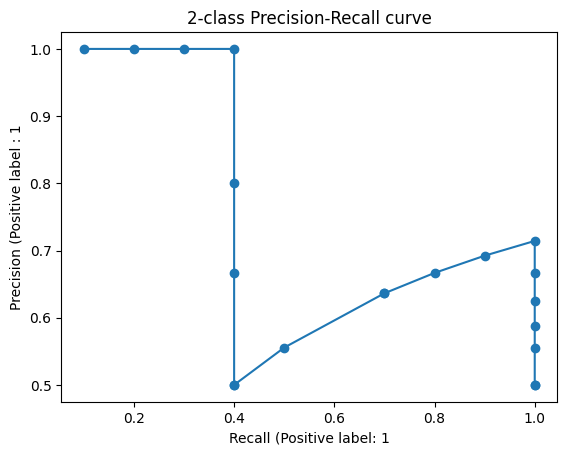

In [13]:
import matplotlib.pyplot as plt

def cal_mAP(conf, label, threshold_list) :
    
    # 정답 라벨 순서에 따라 conf를 내림차순으로 정렬
    sorted_idx = np.argsort(-conf)
    sorted_conf = conf[sorted_idx]
    sorted_label = label[sorted_idx]

    # 각 threshold 별 precision과 recall 계산
    precisions = []
    recalls = []
    for t in threshold_list :
      tp = 0
      fp = 0
      fn = 0
      for i in range(len(sorted_conf)) :
        if sorted_conf[i] >= t :
          if sorted_label[i] == 1 :
            tp += 1
          else :
            fp += 1
        else :
          if sorted_label[i] == 1 :
            fn += 1

      precision = tp / (tp + fp) if tp + fp > 0 else 1
      recall = tp / (tp + fn) if tp + fn > 0 else 1
      precisions.append(precision)
      recalls.append(recall)

    plt.plot(recalls, precisions, marker='o')
    plt.title('2-class Precision-Recall curve')
    plt.xlabel('Recall (Positive label: 1')
    plt.ylabel('Precision (Positive label : 1')

    # precision-recall curve에서 mAP 계산
    avg_precision = 0
    ap_list = []
    for i in range(len(threshold_list) - 1) :
      avg_precision += (recalls[i+1] - recalls[i]) * precisions[i+1]
      ap_list.append(avg_precision)
      map = sum(ap_list) / len(ap_list)
    return map

result = cal_mAP(conf, label, threshold_list)
print(result)
plt.show()

코드를 통해 Precision과 Recall를 구한 뒤 그것을 조건에 따라 배열에 넣어 그래프를 제시했다.

## Extra problem

##### MNIST 손글씨 데이터셋에 대한 Confusion MAtrix와 Precision을 구하고 이에 대한 Micro & Macro Averaged Precision을 구하라

In [14]:
from sklearn.linear_model import SGDClassifier
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
!pwd

/content


In [16]:
%cd /content/drive/MyDrive/Colab Notebooks/assign06

/content/drive/MyDrive/Colab Notebooks/assign06


In [17]:
from dataset.mnist import load_mnist

(train_raw_img, train_label), (test_raw_img, test_label) = load_mnist(flatten=False, normalize=False)
print(train_raw_img.shape)
print(train_label.shape)

(60000, 1, 28, 28)
(60000,)


In [18]:
np.unique(train_label, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]))

In [19]:
# train_dataset split according to the number

new_train_img = [[] for _ in range(10)]
new_train_label = [[] for _ in range(10)]

for i in range(len(train_label)) :
    new_train_img[train_label[i]].append(train_raw_img[i])
    new_train_label[train_label[i]].append(train_label[i])

# print(len(new_train_img[0])) # 0에 해당하는 image 개수
# print(new_train_img[0][0].shape) # 0에 해당하는 image중 첫번째 image의 shape

In [20]:
def make_sample(idx) :
    sample_img = []
    sample_label = []
    
    # data sampling 
    for i in range(10) :
        if i == idx :
            sample_img += new_train_img[i][:1000]
            sample_label += (new_train_label[i][:1000])
        else :
            sample_img += new_train_img[i][:111]
            sample_label += (new_train_label[i][:111])

    sample_img = np.array(sample_img)
    sample_label = np.array(sample_label)
    
    # normalization (set value 0 ~ 1)
    sample_img = sample_img.astype('float')/255
    
    # target number는 1, 아니면 0
    sample_label = np.where(sample_label==idx, 1 ,0)
    
    # reshape
    sample_img = sample_img.reshape(len(sample_img.squeeze()), -1)
    sample_label = sample_label.reshape(len(sample_label.squeeze()), -1)
    
    return sample_img, sample_label

In [21]:
train_X, train_y = make_sample(idx = 0) # idx = target number
train_X = np.insert(train_X, 0, 1, axis=1) # bias 추가

# print(train_y.shape)

In [22]:
# cross entropy loss
def CrossEntropyLoss(preds, y) :
    delta = 1e-7
    loss = np.sum(-y*np.log(preds+delta)-(1-y)*np.log(1-preds+delta))/len(preds)
        
    return loss

loss = CrossEntropyLoss(np.zeros((len(train_X), 1)), train_y)
print('loss : ', loss)

loss :  8.063079315186753


In [23]:
def train(X, y) :
    """_summary_

    Args:
        X : train_X
        y : train_y

    Returns:
        w : weight
    """
    w = np.random.randn(len(X[0]), 1) # weight initialization
    lr = 0.1 # learning rate(수정 가능)
    acc = 0
    
    while (acc < 0.9) :  # acc가 0.9 이상일 때 반복문 탈출
        # predict
        preds = 1 / (1 + np.exp(-np.dot(X, w)))
        loss = CrossEntropyLoss(preds, y)
        
        result = np.where(preds>0.5, 1, 0)
        acc = np.sum(np.where(result==y, True, False))/len(preds)
        
        # gradient descent
        gradient = np.dot(X.T, (preds - y)) / len(preds)
        w -= lr * gradient
        
    return w

In [24]:
def eval(idx, w) :
    """_summary_

    Args:
        idx : target_number
        w : parameter
    """
    test_X = test_raw_img.astype('float')/255    
    test_X = test_X.reshape(len(test_X.squeeze()), -1)
    test_X = np.insert(test_X, 0, 1, axis=1) # + bias

    test_y = np.where(test_label==idx, 1 ,0)
    test_y = test_y.reshape(len(test_y.squeeze()), -1)
    
    preds = 1/(1+np.exp(-test_X.dot(w)))
    result = np.where(preds>0.5, 1, 0)

for i in range(10) :
  test_w = train(train_X, train_y)
  eval(idx=i, w=test_w)

In [25]:
# train several binary linear regression classifier (0~9)
classifiers = []
for i in range(10) :
  clf = SGDClassifier(loss='log', learning_rate='constant', eta0=0.1, max_iter=100)
  # clf = LogisticRegression(max_iter=100) # Logistic Regression 이용
  clf.fit(train_X, train_y.ravel())
  classifiers.append(clf)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skle

In [26]:
# eval

test_X = test_raw_img.astype('float')/255    
test_X = test_X.reshape(len(test_X.squeeze()), -1)
test_X = np.insert(test_X, 0, 1, axis=1) # + bias
print('shape of test_X : ', test_X.shape)
print('shape of test_label : ', test_label.shape)

shape of test_X :  (10000, 785)
shape of test_label :  (10000,)


In [27]:
# confusion matrix of each class (0~9)
from sklearn.metrics import confusion_matrix

def make_confusion_matrix(pred_labels, true_labels):
  cm = confusion_matrix(true_labels, pred_labels)
  return cm

probabilities = []
for clf in classifiers :
  proba = clf.predict_proba(test_X)[:, 1]
  probabilities.append(proba)

probabilities = np.array(probabilities).T

max_pred = np.argmax(probabilities, axis=1)

for i in range(10) :
  pred_labels = np.where(max_pred == i, 1, 0)
  true_labels = np.where(test_label == i, 1, 0)
  cm = make_confusion_matrix(pred_labels, true_labels)
  print(f"Confusion matrix for class {i}:")
  print(cm)

Confusion matrix for class 0:
[[8849  171]
 [ 948   32]]
Confusion matrix for class 1:
[[8487  378]
 [1102   33]]
Confusion matrix for class 2:
[[5260 3708]
 [ 697  335]]
Confusion matrix for class 3:
[[8818  172]
 [ 977   33]]
Confusion matrix for class 4:
[[8940   78]
 [ 982    0]]
Confusion matrix for class 5:
[[9068   40]
 [ 891    1]]
Confusion matrix for class 6:
[[8540  502]
 [ 895   63]]
Confusion matrix for class 7:
[[8146  826]
 [ 655  373]]
Confusion matrix for class 8:
[[7000 2026]
 [ 782  192]]
Confusion matrix for class 9:
[[8068  923]
 [ 895  114]]


In [28]:
# precision for each class
precision = []
for i in range(10):
    tp = np.sum(np.where((test_label != i) & (max_pred != i), True, False)) # True positive
    fp = np.sum(np.where((test_label == i) & (max_pred != i), True, False)) # False positive
    p = tp / (tp + fp)
    print(f"Precision for class {i}:", p)
    precision.append(p)

Precision for class 0: 0.9032356843931816
Precision for class 1: 0.8850766503285014
Precision for class 2: 0.8829947960382744
Precision for class 3: 0.9002552322613578
Precision for class 4: 0.9010280185446482
Precision for class 5: 0.9105331860628577
Precision for class 6: 0.9051404345521993
Precision for class 7: 0.9255766390182933
Precision for class 8: 0.8995116936520174
Precision for class 9: 0.9001450407229722


Train을 통해 Accuracy를 0.9까지 올린 결과 Precision은 대부분 0.9이상이 나왔다.

In [29]:
# macro & micro averaged precision
micro_avg_p = np.sum(np.array([np.sum(np.where((test_label != i) & (max_pred != i), True, False)) for i in range(10)])) / np.sum(np.array([np.sum(np.where(max_pred != i, True, False)) for i in range(10)]))
macro_avg_p = np.mean(np.array(precision))

print("Micro average : ",micro_avg_p)
print("Macro average : ",macro_avg_p)

Micro average :  0.9019555555555555
Macro average :  0.9013497375574303


총 10개의 Precision의 Micro & Macro Average는 비슷한데, 이는 특정 Precision이 rare하게 나온 것이 아니라 모두 균일하게 나왔기 때문이다.